In [1]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.io as scio
import os
import tqdm
import seaborn as sns
import matplotlib
from tqdm import trange
import pandas as pd
import itertools
from sklearn.cluster import KMeans
import matplotlib.image as mpimg
from scipy.signal import find_peaks, peak_prominences

from sklearn.cluster import KMeans
from classification import classification
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error

### 获取路径


In [2]:
clean_data_path_yy = "/public/DATA/covert_reading"
clean_data_path_wzj = "D:/BaiduSyncdisk/code"
clean_data_path_zzh = "/public/DATA/covert_reading"

clean_data_path = clean_data_path_yy

### load ECoG数据

In [3]:
subjects = [44,45,47,48,50,54]
subjects_2 = [71,73,76,78]
HS_Blocks = []
subjects_all = [44,45,47,48,50,54,71,73,76,78]

for HS in subjects_all:
    

    file_name = "HS" + str(HS) + "_Block_overt_covert.mat"
    z3 = scio.loadmat(os.path.join(clean_data_path + "/HSblockdata", file_name))
    z3 = z3["Alldata"][0][0]
    HS_Blocks.append(z3)

    


### load sig data

In [4]:
subjects_all = [44,45,47,48,50,54,71,73,76,78]
sig_elecs_all = {}
for HS in subjects_all:
    subject = f"HS{HS}"
    mat_path = clean_data_path+"/elecs/elec_sig"
    elec_path = mat_path + "/" + str(HS) + "sig_elecs.npy"
    sig_elecs = np.load(elec_path, allow_pickle=True).item()
    elec_all = []
    for i in sig_elecs:
        elec_all.extend(sig_elecs[i])
    sig_elecs_all[subject] = np.unique(elec_all)
# for HS in subjects:
#     print(sig_elecs_all[f"HS{HS}"])

In [5]:
print(sum([len(sig_elecs_all[i]) for i in sig_elecs_all]))

1396


In [6]:
HS_list = [44,45,47,48,50,54,71,73,76,78]
clear_path = clean_data_path+  "/"
region = classification (HS_list,clear_path)
region


{'44': {'postcentral': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   32,
   33,
   34,
   35,
   49,
   50,
   71,
   72,
   73,
   74,
   75,
   76,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   102,
   103,
   104,
   105,
   106,
   107,
   119,
   120],
  'precentral': [8,
   9,
   10,
   11,
   23,
   24,
   25,
   36,
   37,
   38,
   39,
   40,
   51,
   52,
   53,
   54,
   55,
   56,
   77,
   78,
   79,
   95,
   108,
   121,
   122,
   123],
  'middlefrontal': [12,
   13,
   14,
   15,
   26,
   27,
   28,
   29,
   30,
   31,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   93,
   94,
   109,
   110,
   111,
   124,
   125,
   126,
   127],
  'superiortemporal': [48, 112],
  'supramarginal': [64,
   65,
   66,
   67,
   68,
   69,
   70,
   80,
   81,
   82,
   83,
   84,
   85,
   96,
   97,
   98,
   99,
   100,
   101,
   113,
   114,
   115,
   116,
   117,
   1

In [7]:
elec_collection = 0
for HS in subjects_all:
    for region_s in region[f"{HS}"]:
        elec_collection+=len(region[str(HS)][region_s])
print(elec_collection)

2432


### 获取对应脑区涵盖的病人_电极，和erp

In [8]:
def get_ecog(HS,elec):
    HS_Block = HS_Blocks[subjects_all.index(HS)]
    Ecog_title = "ECoG_"
    if HS < 70:
        sound_list = ["ba", "bu", "da", "du", "ga", "gu"]
        forward = int(25)
        backward = int(85)
        task_list = ["overt","covert"]
    else:
        sound_list = ["ba", "da", "ga", "pa", "ta", "ka", "sa", "sha"]
        forward = int(50)
        backward = int(150)
        task_list = ["cue","overt","covert"]
        # task_list = ["overt","covert"]

    ecog = []
    for task in task_list:
        for word in sound_list:
            ecog.append(np.mean(HS_Block[Ecog_title + task + "_" + word][:,elec,150-forward:150+backward],axis = 0))
    return np.array(ecog)

def get_image_HSelec(subjects):
    a = []
    b = []
    for HS in subjects:
        for region_s in region[f"{HS}"]:
            if region_s in ['middlefrontal', 'postcentral','precentral']:
                for elec in region[str(HS)][region_s]:
                    if elec in sig_elecs_all[f"HS{HS}"]:
                        a.append(get_ecog(HS,elec))
                        b.append(f"{HS}_{elec}")
                        
    return a,b


In [9]:
sound_list1 = ["ba", "bu", "da", "du", "ga", "gu"]
task_list1 = ["overt","covert"]
sound_list2 = ["ba", "da", "ga", "pa", "ta", "ka", "sa", "sha"]
task_list2 = ["cue","overt","covert"]
# task_list2 = ["overt","covert"]
y_label1,y_label2=[],[]
for i in task_list1:
    for j in sound_list1:
        y_label1.append(i+'_'+j)


for p in task_list2:
    for q in sound_list2:
        y_label2.append(p+'_'+q)       

In [10]:
image_les70,HS_elec_les70 = get_image_HSelec(subjects)
image_la70,HS_elec_la70 = get_image_HSelec(subjects_2)

In [11]:
def zscore(z):
    return (z-np.mean(z))/np.std(z)

def normalized(flattened_images):
    X = np.array(flattened_images)
    # 数据标准化
    X_normalized = (X - X.min()) / (X.max() - X.min())
    return X_normalized

# # Step 1: Flatten the images
flattened_image_les70 = [zscore(image.flatten())for image in image_les70]
flattened_image_la70 = [zscore(image.flatten())for image in image_la70]


In [12]:


def train_model(flattened_images):
    X = np.array(flattened_images)
    # 数据标准化
    X_normalized = (X - X.min()) / (X.max() - X.min())
    mse = []
    # 初始化NMF模型，指定成分数
    for n_components in range(1,15):
        nmf_model = NMF(n_components=n_components, init='nndsvd', random_state=0, max_iter=10000)

        # 拟合NMF模型
        W = nmf_model.fit_transform(X_normalized)# 成分矩阵
        H = nmf_model.components_ # 系数矩阵
        
        # 可视化结果或执行后续的分析
        # 你可以根据需要使用W和H进行进一步的数据处理和分析
        
        reconstruction = np.dot(W, H)
        rmse = np.sqrt(mean_squared_error(X_normalized, reconstruction))
        mse.append(rmse)
    plt.plot(range(1,15),mse)
    plt.hlines(xmin=1,xmax=15,y=0.05)

    return X_normalized

X_normalized_les70_1 = train_model(flattened_image_les70_1)
X_normalized_les70_2 = train_model(flattened_image_les70_2)

NameError: name 'flattened_image_les70_1' is not defined

In [13]:
X_normalized_les70 = normalized(flattened_image_les70)
X_normalized_la70 = normalized(flattened_image_la70)


In [14]:
n_components_1 = 3

nmf_model_1 = NMF(n_components=n_components_1, init='nndsvd', random_state=0, max_iter=10000)


 # 拟合NMF模型
W_les70 = nmf_model_1.fit_transform(X_normalized_les70) # 成分矩阵
H_les70 = nmf_model_1.components_ # 系数矩阵

 #系数矩阵


In [15]:
n_components_2 = 3
nmf_model_2 = NMF(n_components=n_components_2, init='nndsvd', random_state=0, max_iter=10000)
W_la70 = nmf_model_2.fit_transform(X_normalized_la70) # 成分矩阵
H_la70 = nmf_model_2.components_ 

In [16]:
n_components_2 = 5
nmf_model_2 = NMF(n_components=n_components_2, init='nndsvd', random_state=0, max_iter=10000)
W_la70 = nmf_model_2.fit_transform(X_normalized_la70) # 成分矩阵
H_la70 = nmf_model_2.components_ 

In [17]:
#merge W_la_70
sum_of_mid=np.sum(W_la70[:,1:4],axis=1)
W_la70_temp=np.zeros((W_la70.shape[0],3))
W_la70_temp[:,0]=W_la70[:,0]
W_la70_temp[:,1]=sum_of_mid
W_la70_temp[:,2]=W_la70[:,4]

In [19]:
W_la70.shape

(359, 5)

In [20]:
W_la70_temp.shape

(359, 3)

In [21]:
W_les70.shape

(387, 3)

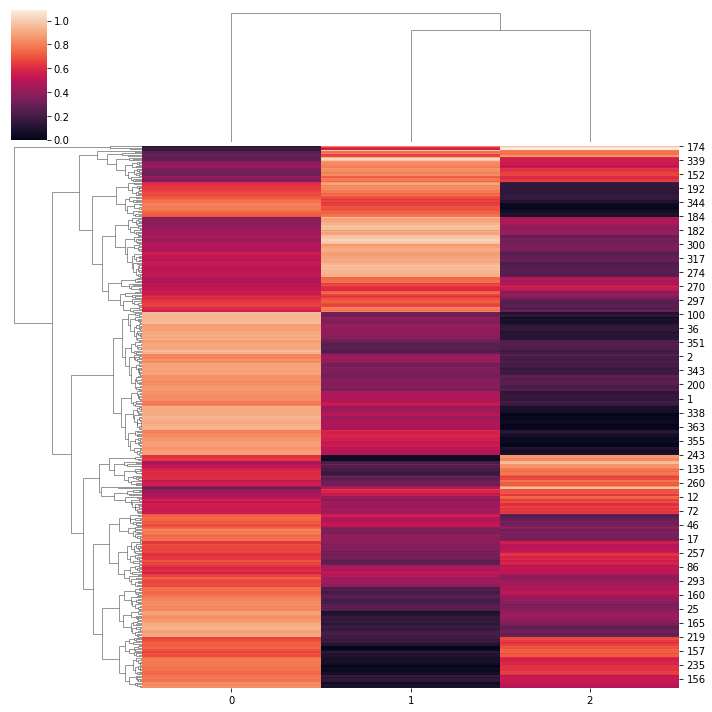

In [29]:
sns.clustermap(W_les70)

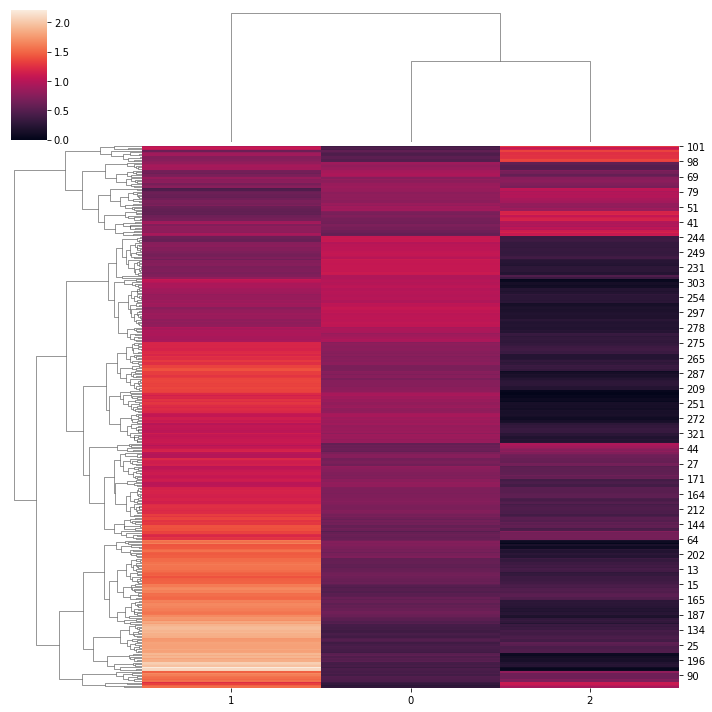

In [31]:
sns.clustermap(W_la70_temp)

Text(0.5, 0.98, 'les 70 ')

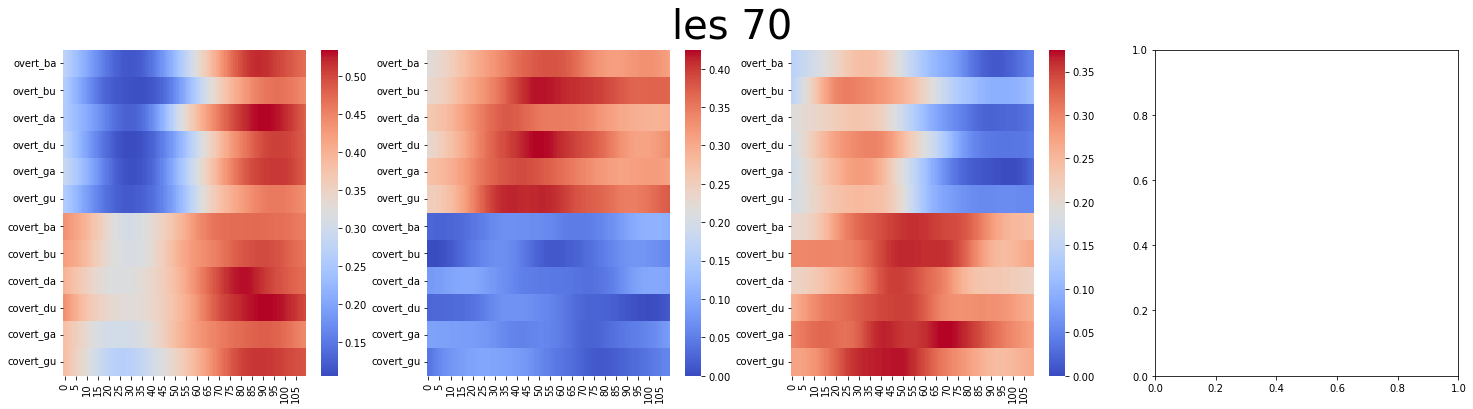

In [22]:
nums_plots=H_les70.shape[0]

fig, axs = plt.subplots(int(nums_plots/4)+1, 4, figsize=(25, int(25/4)*(1+int(nums_plots/4))))
ax = 0 
for i in range(H_les70.shape[0]):
    sns.heatmap(H_les70[i,:].reshape(12,110),ax=axs.flatten()[ax],yticklabels=y_label1,cmap='coolwarm',cbar=True)
    ax+=1
plt.suptitle("les 70 ",size=40)



Text(0.5, 0.98, 'la 70')

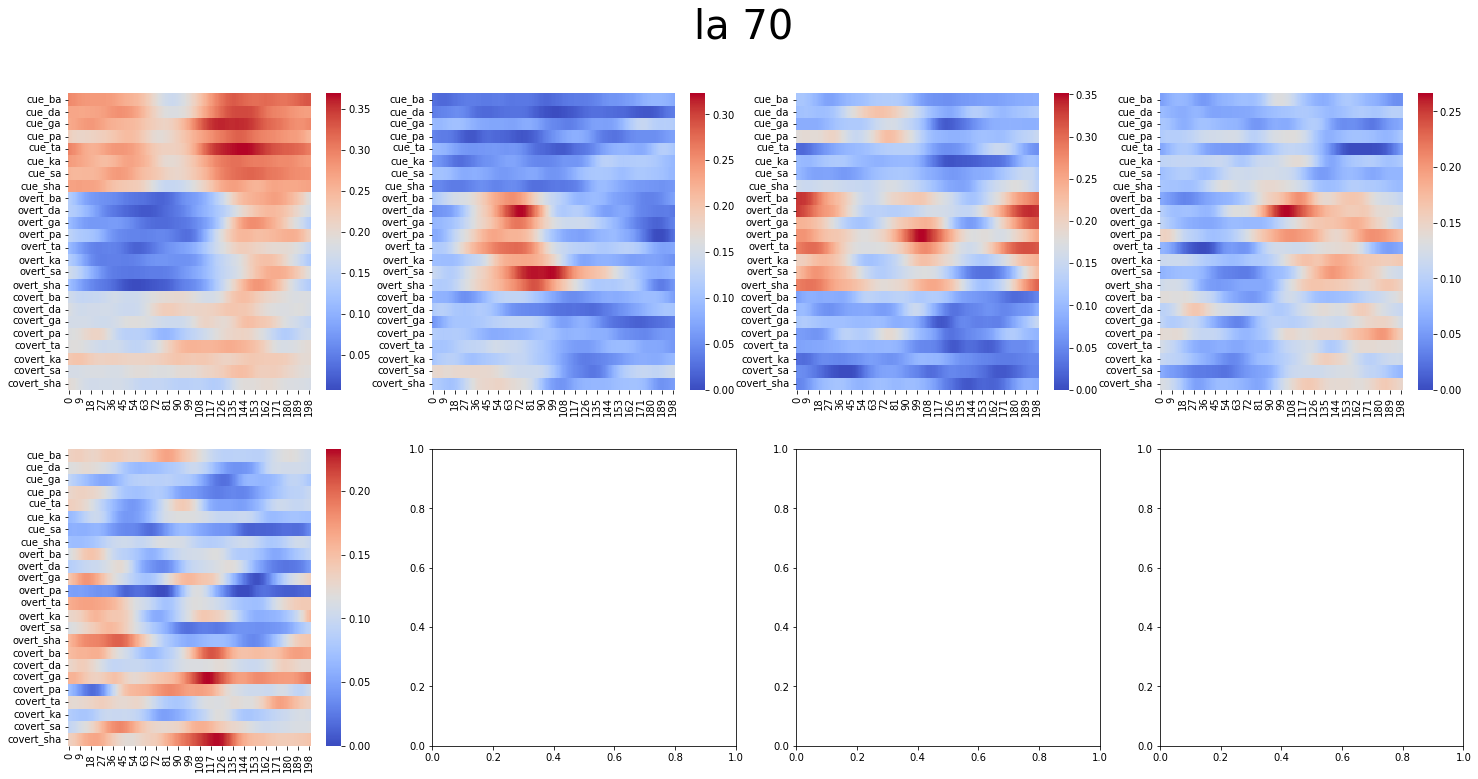

In [23]:
nums_plots=H_la70.shape[0]
fig, axs = plt.subplots(int(nums_plots/4)+1, 4, figsize=(25, int(25/4)*(1+int(nums_plots/4))))
ax = 0 
for i in range(H_la70.shape[0]):
    sns.heatmap(H_la70[i,:].reshape(24,200),ax=axs.flatten()[ax],yticklabels=y_label2,cmap='coolwarm',cbar=True)
    ax+=1
plt.suptitle("la 70",size=40)

ValueError: cannot reshape array of size 4800 into shape (16,200)

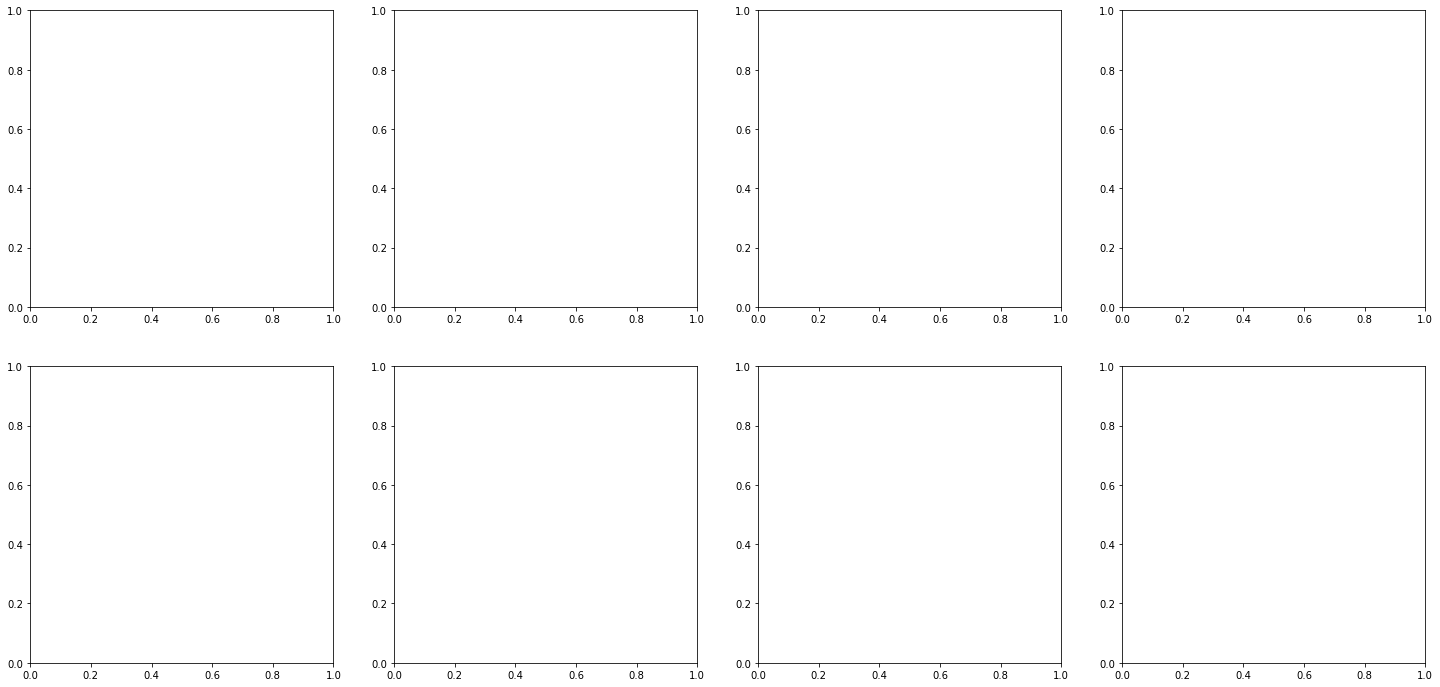

In [24]:
nums_plots=H_la70.shape[0]
fig, axs = plt.subplots(int(nums_plots/4)+1, 4, figsize=(25, int(25/4)*(1+int(nums_plots/4))))
ax = 0 
for i in range(H_la70.shape[0]):
    sns.heatmap(H_la70[i,:].reshape(16,200),ax=axs.flatten()[ax],yticklabels=y_label2,cmap='coolwarm',cbar=True)
    ax+=1
plt.suptitle("la 70",size=40)

In [25]:
W_les70.shape
W = W_les70
W = W/np.sum(W,axis=1)[:,np.newaxis]
print(np.max(W))
label = np.argmax(W,axis=1)
v = label
print(v)

0.7037099143860415
[0 0 0 0 1 0 0 0 0 2 0 0 2 2 0 0 0 0 2 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 2 0 2 2 2 2 1 0 2 2 2 2 0
 0 0 0 2 2 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 2 0 0 2 2 0 0 0 1 2 2 0 1 2 2 2 2 0 2 1 1 2 2 1 2 2 1 1
 2 0 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 0 0 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 2
 0 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 0 1 2
 2 1 1 1 1 0 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [26]:
W_la70_merged=W_la70_temp
n_components_2_merged=3

In [27]:
W2 = W_la70_merged
W2 = W2/np.sum(W2,axis=1)[:,np.newaxis]
print(np.max(W2))
label2 = np.argmax(W2,axis=1)
v2 = label2
print(v2)

0.8325663581828395
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 1 1 1 1 2 2 2 2 0 2 2 2 0 0 0 2 2 0 0 0 2 1 0 0 0 1 0 0 2 0 2
 0 2 2 1 2 2 2 2 2 2 2 2 1 1 1 1 1 2 2 1 2 2 2 2 2 2 2 2 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1
 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1]


In [77]:
W3 = W_la70
W3 = W3/np.sum(W3,axis=1)[:,np.newaxis]
print(np.max(W3))
label3 = np.argmax(W3,axis=1)
v3 = label3
print(v3)

0.668822290383535
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 0
 0 2 1 2 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2
 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 2 0 0
 0 2 2 2 2 2 1 0 2 1 2 2 1 2 0 0 2 0 2 2 2 2 0 0 0 0 0 0 1 2 1 0 0 2 0 0 0
 0 2 2 2 2 0 0 0 2 0 0 0 0 0 0 2 0 0 0 2 2 0 0 0 2 2 0 0 2 2 2 0 0 0 2 2 0
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0
 2 0 0 0 2 0 0 2 2 0 0 2 2 2 0 0 0 0 2 2 0 0 0 0 2 2 2 2 2 0 0 0 0 2 2 2 0
 2 2 2 2 2 0 2 0 0 0 0 0 0 2 2 0 2 1 1 0 2 2 0 2 0 2]


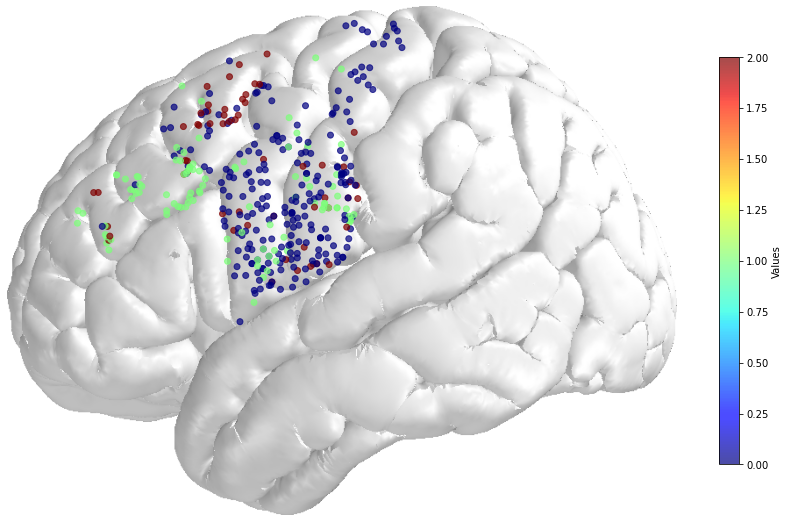

In [46]:
n_components=3
xy_all = {}
path = clean_data_path

for HS in subjects_all:
     subject = f"HS{HS}"
     xy_all[subject] = scio.loadmat(path +"/elecs/warped/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
import matplotlib.cm as cm

def plot_NMF_W4H_cluster(images,HS_elec,v):
    img = mpimg.imread(path +"/elecs/MNI.png")
    fig, ax = plt.subplots(figsize=(15,15))
    ax.imshow(img)

    x_coords2, y_coords2 = [],[]


    for i,img_temp in enumerate(images):
        HS3,elec3 = HS_elec[i].split("_")
        elec3 = int(elec3)
        xy3 = xy_all[f"HS{HS3}"]
        x_coords2.append(xy3[elec3][0])
        y_coords2.append(xy3[elec3][1])

    scatter=plt.scatter(x_coords2, y_coords2, c=v,cmap="jet",  alpha = 0.7)

    plt.grid('off') 
    plt.axis('off')
    
    plt.xticks([])
    plt.yticks([])
    cbar = plt.colorbar(scatter, shrink=0.5)  
    cbar.set_label('Values') 
    
plot_NMF_W4H_cluster(image_les70,HS_elec_les70,v)

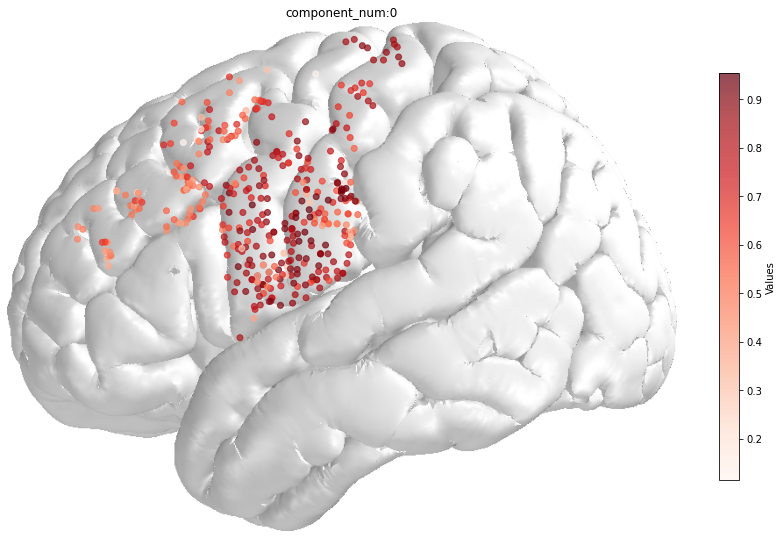

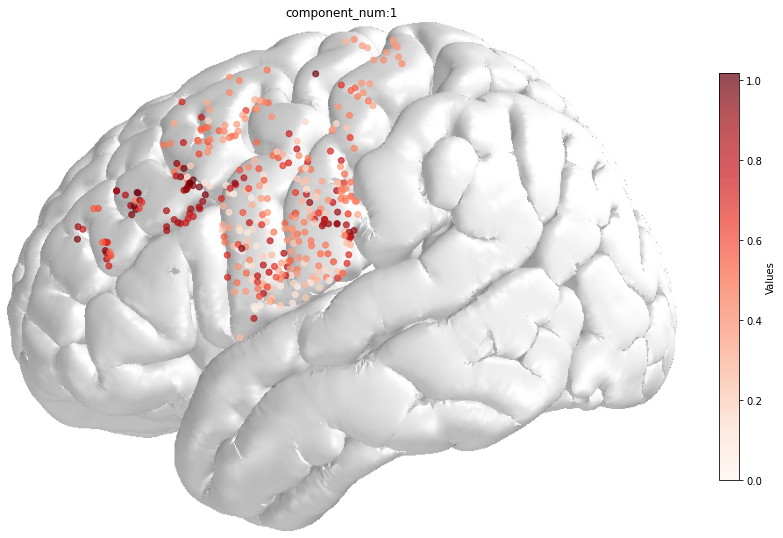

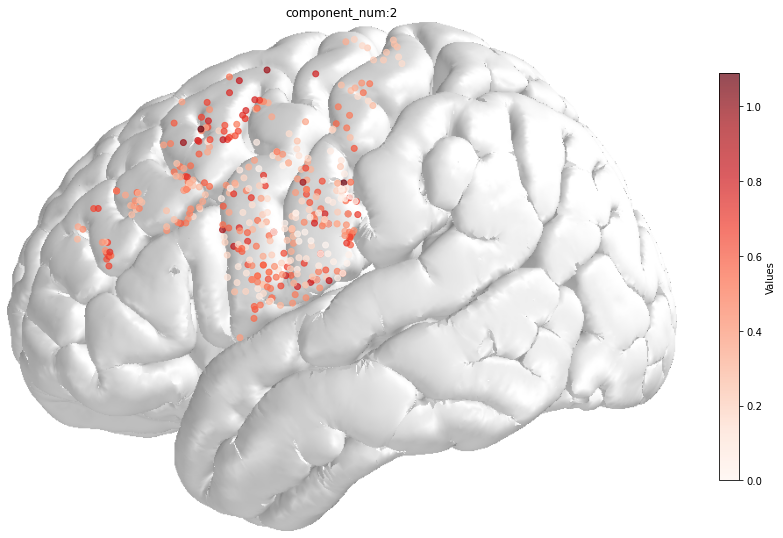

In [48]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_NMF_W4H(component_num, images, HS_elec, W):
    img = mpimg.imread(path + "/elecs/MNI.png")
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.imshow(img)

    x_coords2, y_coords2 = [], []
    values2 = []
    ax_ind = 0

    for i, img_temp in enumerate(images):
        HS3, elec3 = HS_elec[i].split("_")
        elec3 = int(elec3)
        xy3 = xy_all[f"HS{HS3}"]
        x_coords2.append(xy3[elec3][0])
        y_coords2.append(xy3[elec3][1])

        values2.append(W[i, component_num])

    scatter=plt.scatter(x_coords2, y_coords2, c=values2, cmap='Reds', alpha=0.7)
    plt.grid('off')
    plt.axis('off')

    plt.xticks([])
    plt.yticks([])
    plt.title(f"component_num:{component_num}")

    # 添加colorbar并调整粗细
    cbar = plt.colorbar(scatter, shrink=0.5)  
    cbar.set_label('Values') 

for i in range(n_components):
    plot_NMF_W4H(i,image_les70,HS_elec_les70,W_les70)

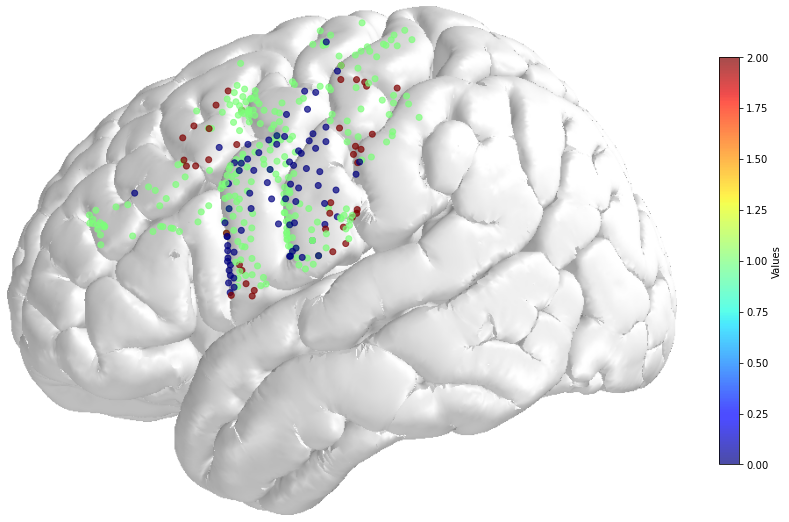

In [47]:
plot_NMF_W4H_cluster(image_la70,HS_elec_la70,v2)

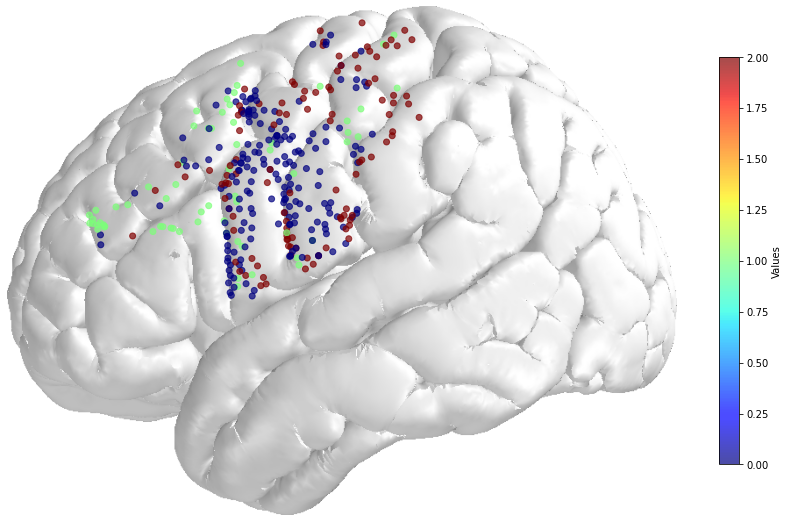

In [78]:
plot_NMF_W4H_cluster(image_la70,HS_elec_la70,v3)

In [80]:
W_la70.shape

(359, 3)

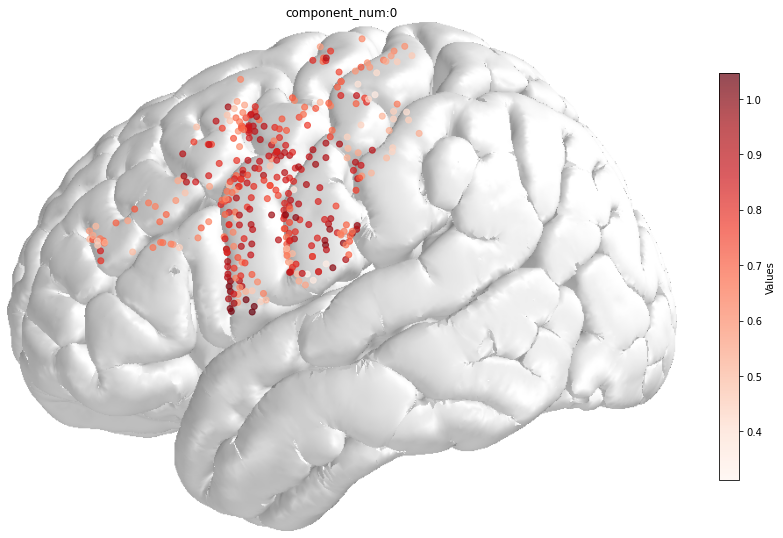

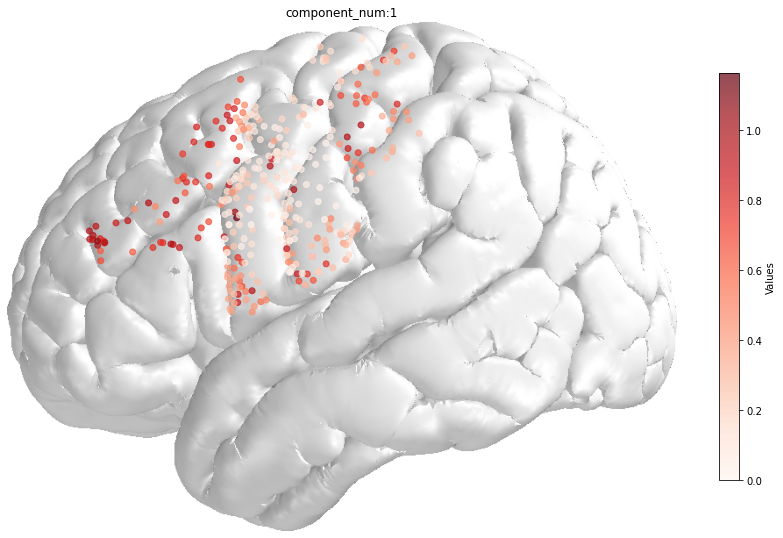

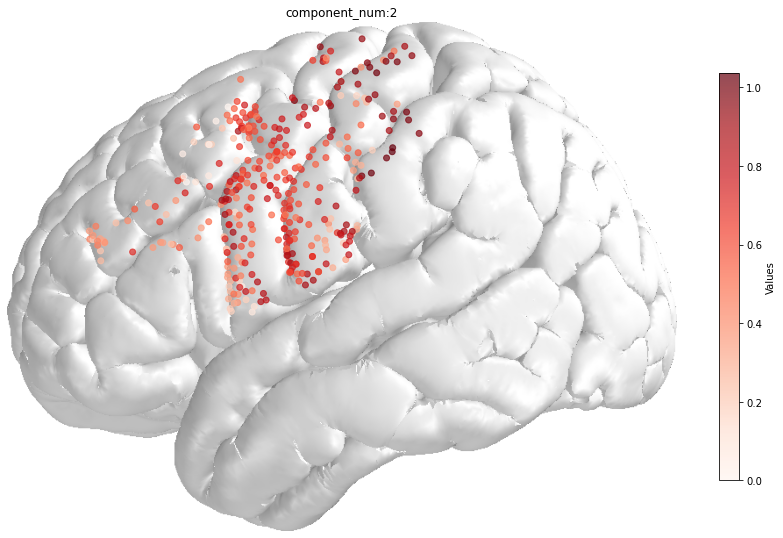

In [79]:
for i in range(3):
     plot_NMF_W4H(i,image_la70,HS_elec_la70,W_la70)

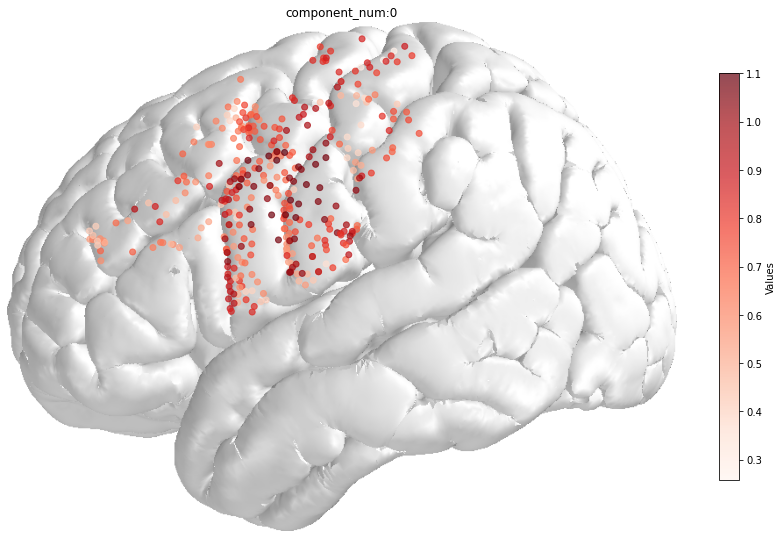

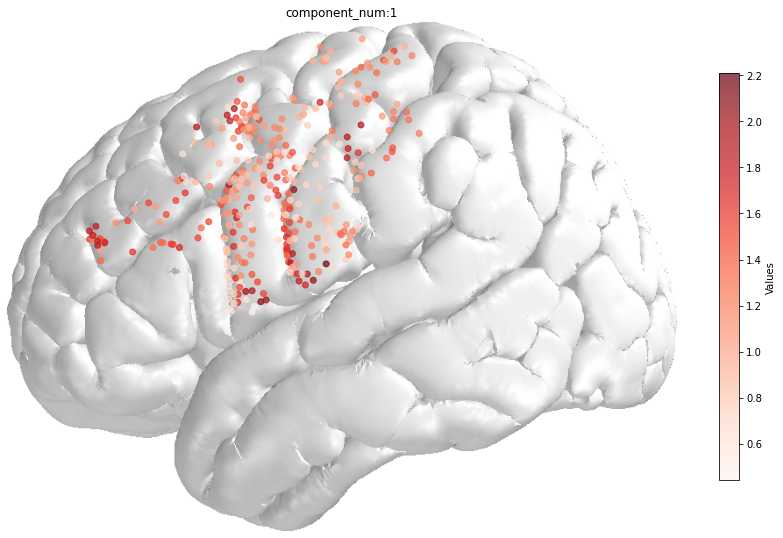

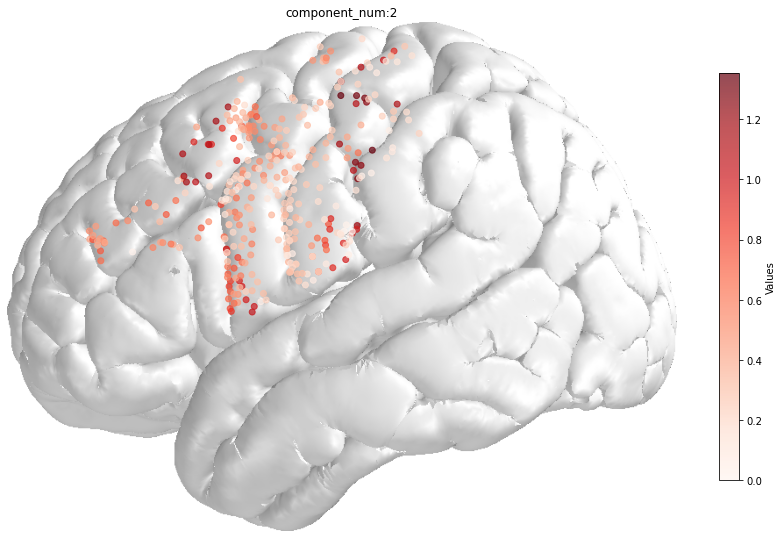

In [49]:
for i in range(n_components_2_merged):
     plot_NMF_W4H(i,image_la70,HS_elec_la70,W_la70_merged)